# Amazon Book Reviews & Book Details 

### Little Shop around the corner is opening a new location and needs to select the best selection of books for its in store shelves. 

Data: 
    Utilizing two data sets the goal is to gain sentiment analysis based on genres and on individual books. 


Data: 
    Utilizing two data sets the goal is to gain sentiment analysis based on genres and on individual books. 

In [1]:
#Import Libraries for Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import re

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
# More Libraries for visualization

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
from skimage import io
import missingno as msno
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO

In [3]:
# Import Data Files

df_books = pd.read_csv('/Users/crystal.grant/Desktop/Data Science/Mini Project 3/books_data.csv')
df_reviews = pd.read_csv('/Users/crystal.grant/Desktop/Data Science/Mini Project 3/Books_rating.csv')

In [4]:
df_books.tail()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN


In [5]:
df_reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## EDA On Data 

- Goal: Identify missing values, drop unneccessary columns, join both files (necessary columns only)
- Perform Visualization to understand top genres and books utilizing scores and helpfulness of scores
- Prepare Data for data for Sentiment analysis then visualize the Sentiment analysis 


In [6]:
df_books.shape

(212404, 10)

In [7]:
df_reviews.shape

(3000000, 10)

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [9]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [10]:
df_reviews.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [11]:
df_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [12]:
#Check for missing values

df_reviews.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

<Axes: >

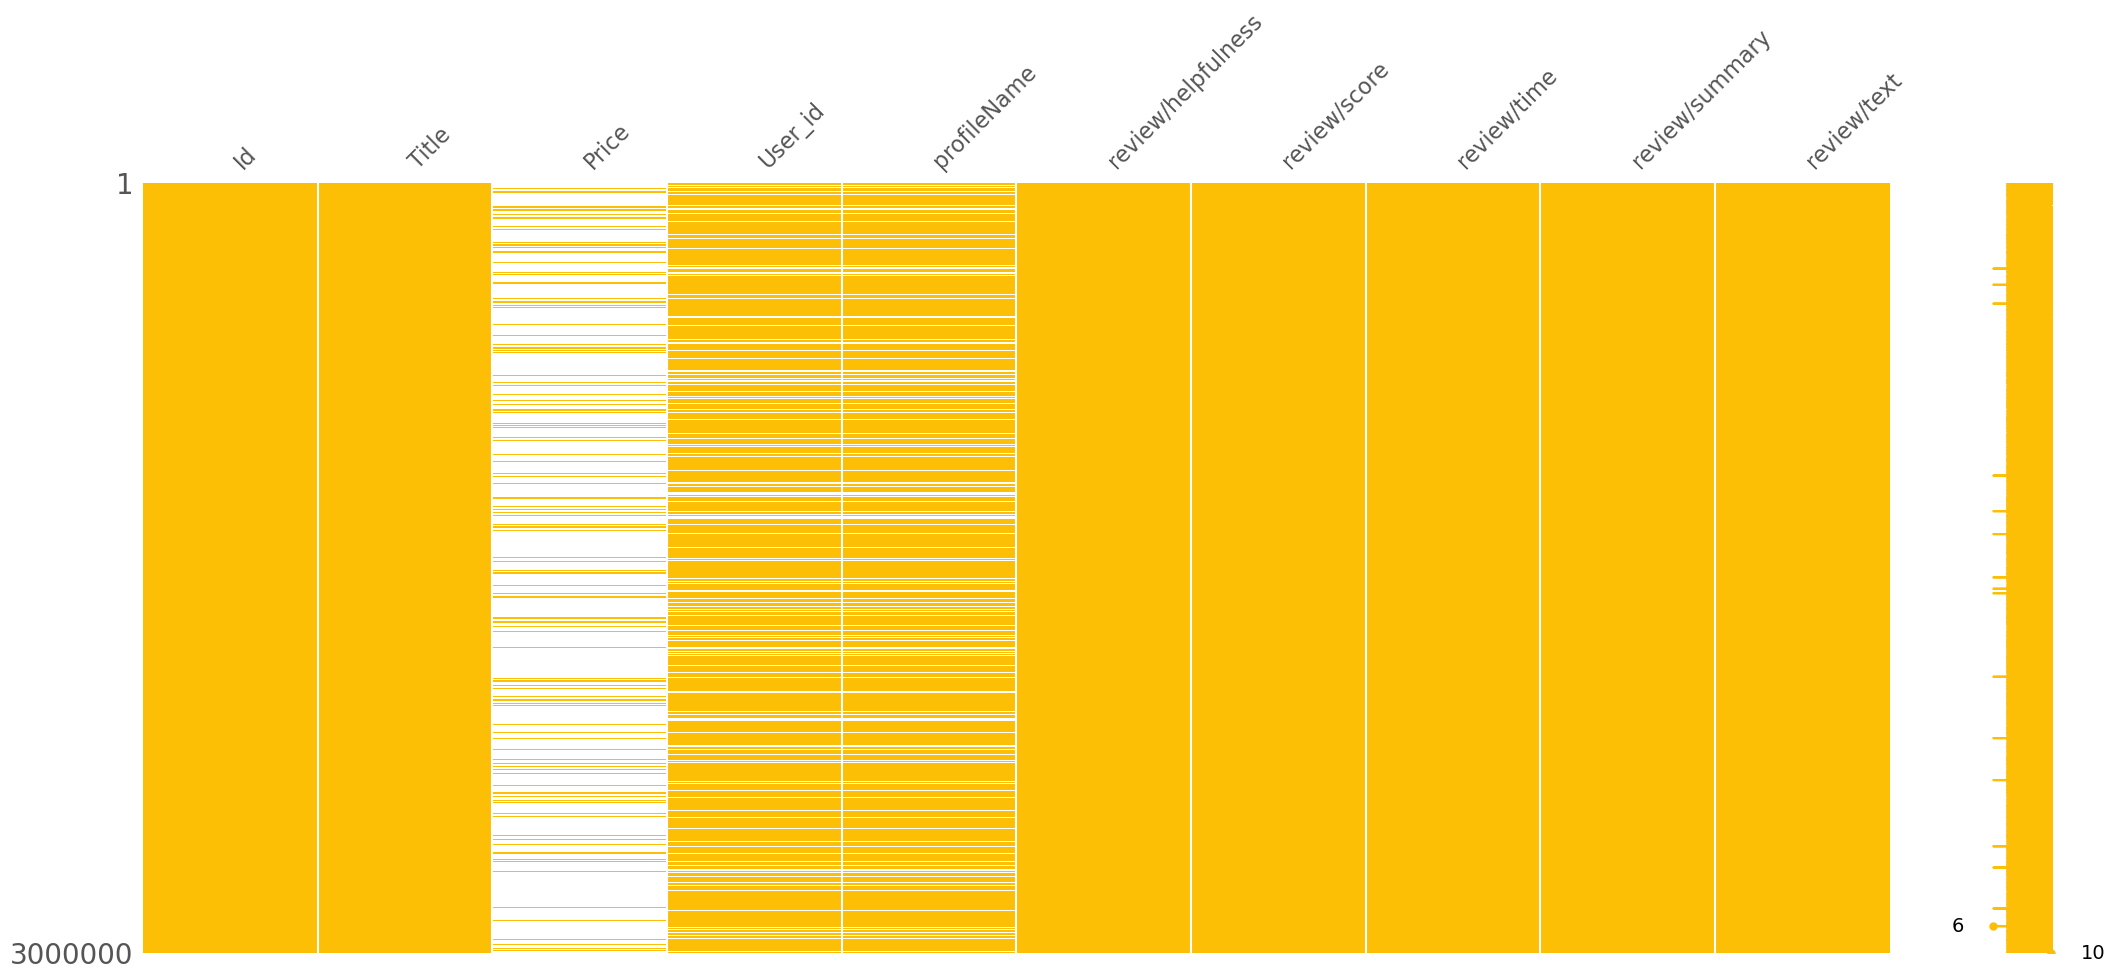

In [13]:
## Based on the results - Price will offer little value to the analysis, so we will drop it

msno.matrix(df_reviews,color=(0.99, 0.75, 0.023))

In [14]:
df_books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

<Axes: >

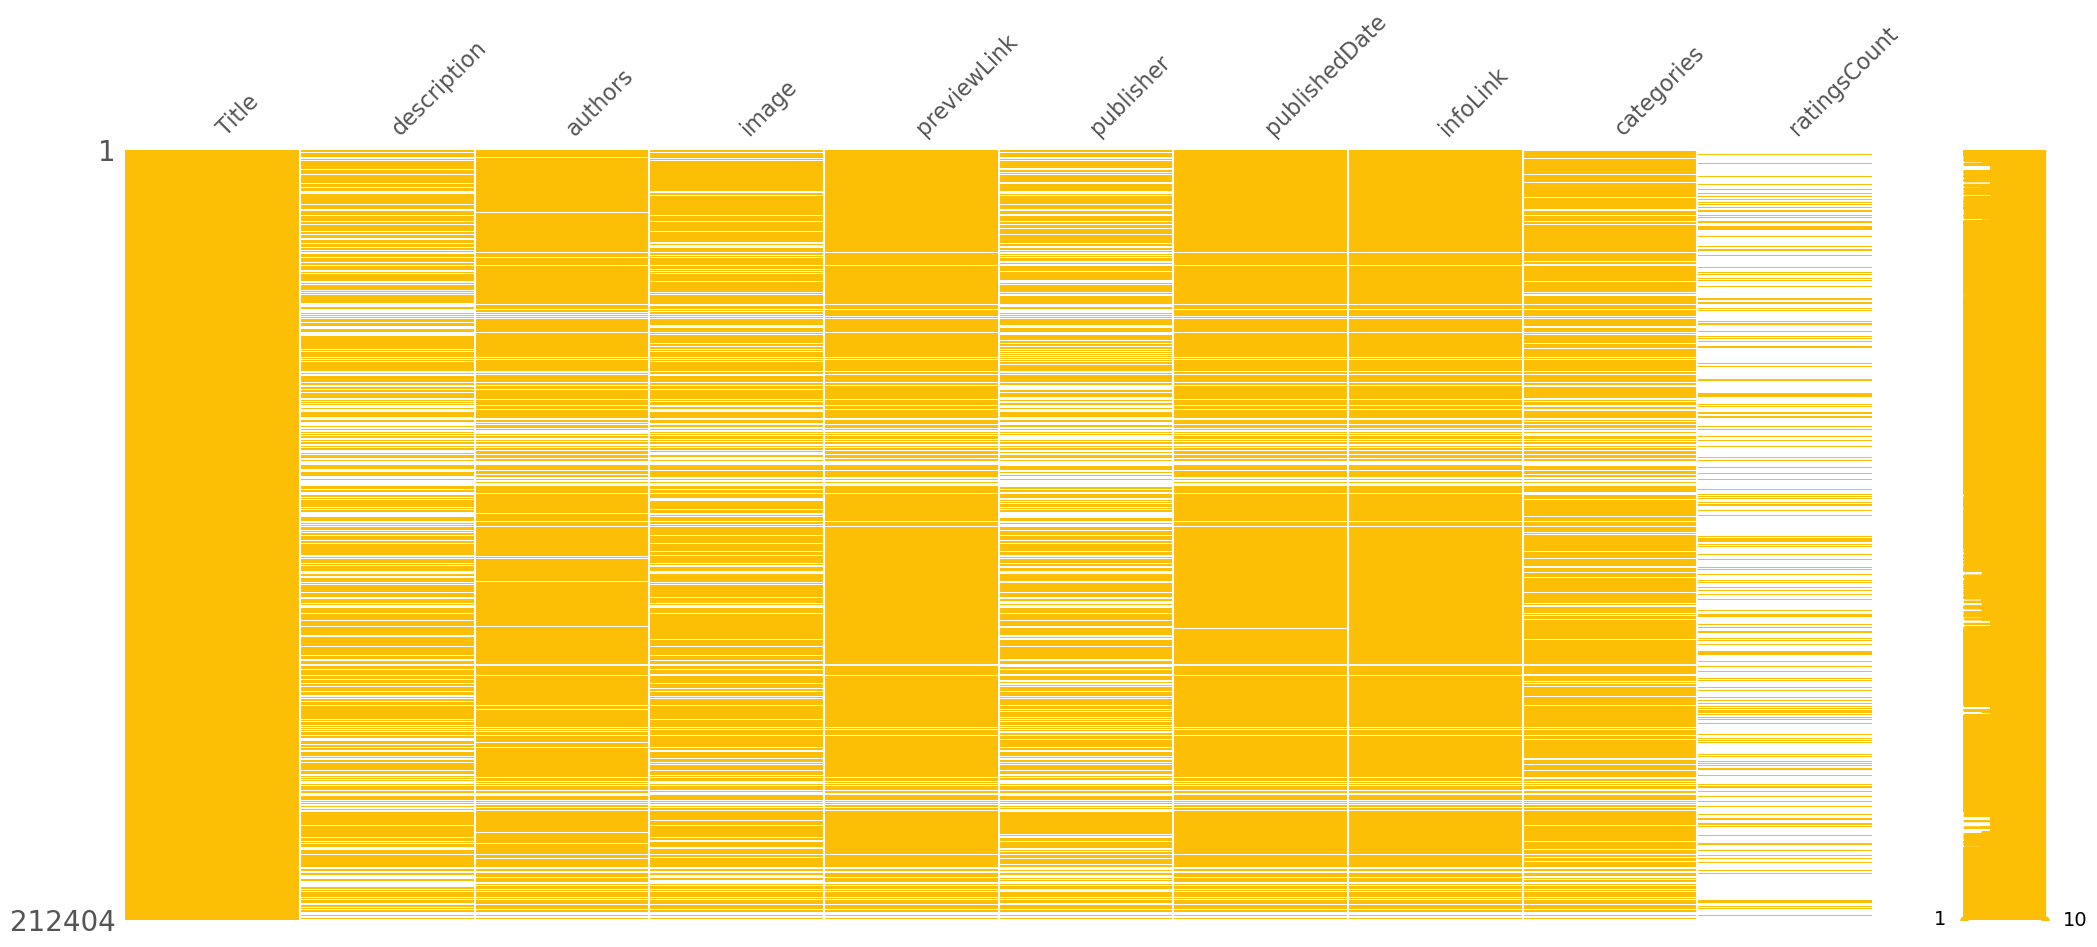

In [15]:
# Based on results - Most columns are missing data, but we are only interested in Title, description, and categories
msno.matrix(df_books,color=(0.99, 0.75, 0.023))

In [16]:
# Understanding Unique Values
print(f'Total Ids: {df_reviews.Id.count()}')
print(f'Total Unique Ids: {df_reviews.Id.nunique()}')
print(f'Total User Ids: {df_reviews.User_id.count()}')
print(f'Total Unique User Ids: {df_reviews.User_id.nunique()}')


Total Ids: 3000000
Total Unique Ids: 221998
Total User Ids: 2438213
Total Unique User Ids: 1008972


In [17]:
print(f'Total Titles in reviews: {df_reviews.Title.count()}')
print(f'Total Unique Titles in reviews: {df_reviews.Title.nunique()}')
print(f'Total Book Titles: {df_books.Title.count()}')
print(f'Total Unique Book Titles: {df_books.Title.nunique()}')

Total Titles in reviews: 2999792
Total Unique Titles in reviews: 212403
Total Book Titles: 212403
Total Unique Book Titles: 212403


In [18]:
# Understand distribution of ratings

colors = ['gold', 'mediumturquoise','brown']
labels = df_reviews['review/score'].value_counts().keys().map(str)
values = df_reviews['review/score'].value_counts()/df_reviews['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.show()

In [19]:
# Top 50 books with most Reviews

user_per_book=df_reviews.groupby('Title')['User_id'].count()
user_per_book=user_per_book.sort_values(ascending = False)
fig = px.bar(user_per_book.head(50))
fig.show()

## Combine both Data sets to one Data Frame

In [20]:
#Combine the two datasets based on Title

book_reviews = pd.merge(df_books, df_reviews, on='Title', how='inner')

In [21]:
book_reviews.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [22]:
book_reviews.shape

(3000000, 19)

In [23]:
#Understanding Null Values

book_reviews.isnull().sum()

Title                     208
description            640225
authors                390634
image                  540306
previewLink            330623
publisher              782617
publishedDate          354581
infoLink               330623
categories             551498
ratingsCount          1360694
Id                          0
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [24]:
#How many rows with missing profileName also have missing User_id  
book_reviews[book_reviews['User_id'].isnull() & book_reviews['profileName'].isnull()].shape


(561787, 19)

In [25]:
print(f'Total Unique Profile Names: {book_reviews.profileName.nunique()}')

Total Unique Profile Names: 854145


In [26]:
#Drop Unnecessary Columns in new dataset
books_reviewed= book_reviews.drop(['image','previewLink','publisher','publishedDate','infoLink','Price', 'User_id','review/time'], axis=1)

books_reviewed.head()

,Title,description,authors,categories,ratingsCount,Id,profileName,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],NaN,1882931173,"Jim of Oz ""jim-of-oz""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,0826414346,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,0826414346,John Granger,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,0826414346,"Roy E. Perry ""amateur philosopher""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,0826414346,"D. H. Richards ""ninthwavestore""",3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [27]:
books_reviewed.shape

(3000000, 11)

In [28]:
#Find the rows with ID == to 0801841119
books_reviewed[books_reviewed['Id'] == '059528812X']

,Title,description,authors,categories,ratingsCount,Id,profileName,review/helpfulness,review/score,review/summary,review/text
21289,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,David Williams,2/2,4.0,Far Better Than I Expected...,Okay... first I have to say that this is not m...
21290,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,Marnieve,10/15,5.0,a riveting page turner!,Madison McGraw takes a very sensitive subject ...
21291,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,NaN,8/15,4.0,Justify The Means is a must read,The characters are well defined and the reader...
21292,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,Elly Sparks,0/2,5.0,"Wry, Witty, and True Mystery","This is a great book about friendship, loyalty..."
21293,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,Erin P,27/48,1.0,Terrible,I saw this title in my local library on the do...
21294,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,Sara,8/16,5.0,Bone deep emotional truth,Justify The Means offers bone-deep emotional t...
21295,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,Gary,5/14,5.0,A FRESH VOICE,"With keen prose and an extraordinary eye, Madi..."
21296,NaN,NaN,['Maharshi Ramana'],NaN,1.0,059528812X,Voice of Reason,6/20,1.0,Pure Trash,This book is a total piece of trash written by...


In [29]:
# view rows with null Title values only show the unique values
books_reviewed[books_reviewed['Title'].isnull()]['Id'].unique()


array(['B00005XZDV', '0801841119', '0595241034', '0912411201',
       'B00005VRQL', '0313329486', '0595292763', 'B0000DCW08',
       '059528812X'], dtype=object)

In [30]:
# Can I locate any missing titles with their IDs? Match the ID to the Title

#Find the rows with ID == to 0801841119
books_reviewed[books_reviewed['Id'] == '0313329486']

,Title,description,authors,categories,ratingsCount,Id,profileName,review/helpfulness,review/score,review/summary,review/text
21283,NaN,NaN,['Maharshi Ramana'],NaN,1.0,0313329486,"D. Donovan, Editor/Sr. Reviewer ""California B...",0/0,5.0,You can't get more authoritative than this,"Joseph R. Marbach, Ellis Katz and Troy E. Smit..."


In [31]:
#Drop rows with missing values to reduce data set

books_reviewed.dropna(subset=['Title'], inplace=True)   
books_reviewed.dropna(subset=['description'], inplace=True)
books_reviewed.dropna(subset=['categories'], inplace=True)
books_reviewed.dropna(subset=['review/text'], inplace=True)
books_reviewed.dropna(subset=['authors'], inplace=True)
books_reviewed.dropna(subset=['ratingsCount'], inplace=True)
books_reviewed.dropna(subset=['review/summary'], inplace=True)
books_reviewed.dropna(subset=['profileName'], inplace=True)

In [32]:
books_reviewed.isnull().sum()

Title                 0
description           0
authors               0
categories            0
ratingsCount          0
Id                    0
profileName           0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
dtype: int64

In [33]:
books_reviewed.shape

(1198823, 11)

In [34]:
# Create a new column 'index_column' with the index values
books_reviewed['review_id'] = books_reviewed.index

books_reviewed.head()

,Title,description,authors,categories,ratingsCount,Id,profileName,review/helpfulness,review/score,review/summary,review/text,review_id
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,Christopher J. Bray,74/81,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,47
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,haskell,2/3,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,48
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,GodsBreath.wordpress,2/3,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,49
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,Edward E. Howe,3/5,4.0,Christ is Lord,This is a very useful and thorough text book. ...,50
181,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],['Biography & Autobiography'],1.0,157067051X,John Washington,21/21,5.0,Excellent perspective on communal living and h...,"Ironically, I grew up in a small town close to...",181


## Data Visualization

In [35]:
# Number of unique Categories
print(f'Total Categories: {books_reviewed.categories.count()}')
print(f'Total Unique Categories: {books_reviewed.categories.nunique()}')

#print array of unique categories
books_reviewed.categories.unique()

Total Categories: 1198823
Total Unique Categories: 1661


array(["['Religion']", "['Biography & Autobiography']", "['History']",
       ..., "['Colombo (Sri Lanka)']", "['Mastodons']",
       "['Tarzan (Fictitious character)']"], dtype=object)

In [36]:
### Understanding the categories column and its unique values

import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Count occurrences of each unique value and sort from highest to lowest count
category_counts = books_reviewed['categories'].value_counts()
sorted_categories = category_counts.sort_values(ascending=False)

# Convert the sorted categories and counts to a formatted string
categories_list_str = '\n'.join(f'{category}: {count}' for category, count in sorted_categories.items())

# Create and display the textarea widget
categories_list = widgets.Textarea(value=categories_list_str, layout=widgets.Layout(width='100%', height='400px'))
display(categories_list)

Textarea(value='[\'Fiction\']: 510513\n[\'Juvenile Fiction\']: 118161\n[\'Biography & Autobiography\']: 61487\…

In [37]:
# Remove categories with less than 4000 occurrences and more than 200000 occurrences
categories_to_keep = category_counts[(category_counts >= 4000) & (category_counts <= 200000)].index
books_reviewed = books_reviewed[books_reviewed['categories'].isin(categories_to_keep)]


In [38]:
books_reviewed.shape

(560945, 12)

In [39]:
#Number of unique categories
print(f'Total Categories: {books_reviewed.categories.count()}')
print(f'Total Unique Categories: {books_reviewed.categories.nunique()}')

Total Categories: 560945
Total Unique Categories: 32


In [40]:
# Group by 'categories' and 'review_scores', and count the number of titles
category_review_counts = books_reviewed.groupby(['categories', 'review/score']).size().reset_index(name='count')

# Create a bar chart
fig = px.bar(
    category_review_counts,
    x='categories',
    y='count',
    color='review/score',
    barmode='stack',  # Use 'group' for grouped bar chart
    labels={'count': 'Count of Titles', 'categories': 'Category', 'review_/score': 'Review Score'},
    title='Count of Titles in Each Category Based on Review Scores'
)

# Show the plot
fig.show()


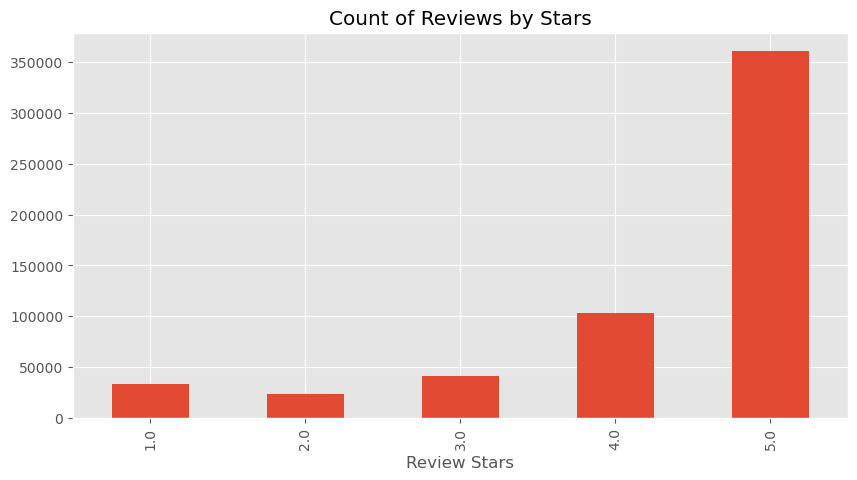

In [41]:
ax = books_reviewed['review/score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


## Begin Sentiment Analysis

    - Further Visualization to come

#Basic NLTK Text Preprocessing 

I will begin analysis on just one text field first - to understand which text field is best to use for analysis (Description, review/text, or review/summary)

- Vader Sentiment Scoring 
- Roberta Pretrained Model 
- Combine and Compare


#NLTK
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

Using "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.


In [42]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/crystal.grant/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [44]:
# Run the polarity score on the entire dataset - results will be stored in a dictionary called res for results
res = {}
for i, row in tqdm(books_reviewed.iterrows(), total=len(books_reviewed)):
    text = row['review/text']
    myid = row['review_id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/560945 [00:00<?, ?it/s]

In [45]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'review_id'})
vaders = vaders.merge(books_reviewed, how='left')

In [46]:
#Sentiment scores and Original dataset

vaders.head()

,review_id,neg,neu,pos,compound,Title,description,authors,categories,ratingsCount,Id,profileName,review/helpfulness,review/score,review/summary,review/text
0,47,0.012,0.859,0.129,0.9989,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,Christopher J. Bray,74/81,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
1,48,0.067,0.901,0.032,-0.2498,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,haskell,2/3,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...
2,49,0.000,0.724,0.276,0.8834,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,GodsBreath.wordpress,2/3,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...
3,50,0.000,0.787,0.213,0.6901,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,Edward E. Howe,3/5,4.0,Christ is Lord,This is a very useful and thorough text book. ...
4,181,0.088,0.721,0.191,0.9821,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],['Biography & Autobiography'],1.0,157067051X,John Washington,21/21,5.0,Excellent perspective on communal living and h...,"Ironically, I grew up in a small town close to..."


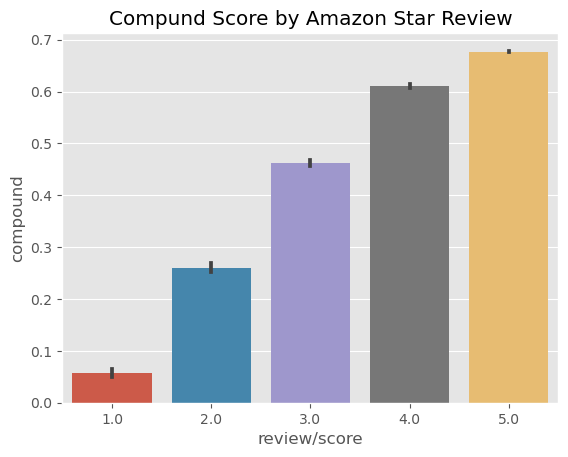

In [47]:
# Plot Vader Results

ax = sns.barplot(data=vaders, x='review/score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

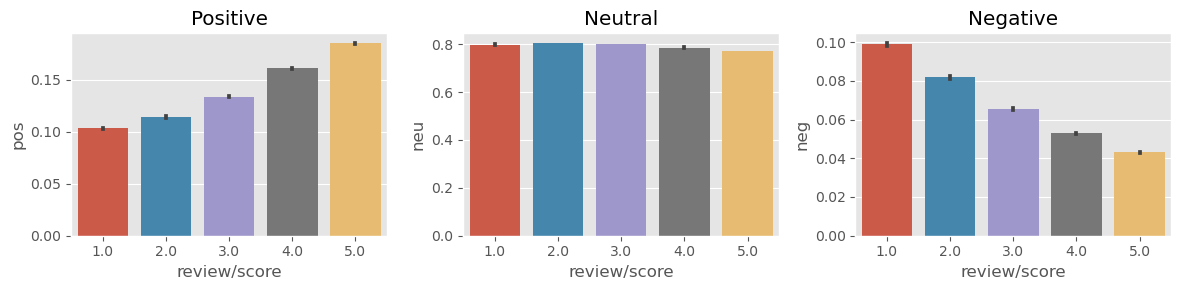

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='review/score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review/score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review/score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model
Use a model trained of a large corpus of data.


In [49]:
import transformers
import tensorflow as tf

print(tf.__version__)
print(transformers.__version__)

2.16.1
4.32.1


In [50]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [53]:
from transformers import TFAutoModelForSequenceClassification

# Model name
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"  # Ensure this is correct

try:
    # Attempt to load the model
    model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
    print("Model loaded successfully!")
except Exception as e:
    print(f"An error occurred: {e}")

# As a fallback, try loading a different model
try:
    fallback_model = "distilbert-base-uncased-finetuned-sst-2-english"
    model = TFAutoModelForSequenceClassification.from_pretrained(fallback_model)
    print("Fallback model loaded successfully!")
except Exception as e:
    print(f"An error occurred with the fallback model: {e}")

An error occurred: 'NoneType' object is not callable
An error occurred with the fallback model: 'NoneType' object is not callable


In [52]:
#do i have pytorch installed?
import torch
print(torch.__version__)

2.3.1


In [54]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")


/Users/crystal.grant/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning:

torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.



pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [55]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [57]:
example = books_reviewed['review/text'][50]
print(example)

This is a very useful and thorough text book. I would recommend it for anyone who wants an in depth study of the Lord's church.


In [58]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This is a very useful and thorough text book. I would recommend it for anyone who wants an in depth study of the Lord's church.


{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.6901}

In [59]:
# Run for Roberta Model
#Easy to see that the model is more accurate than VADER
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0015973218, 'roberta_neu': 0.031401403, 'roberta_pos': 0.9670012}


##Attempt more pre-processing on text data to resolve errors

- Tokenize the data 
- Remove stop words
-Perform Stemming and Lemmetization
- then utilize TD-IDF


In [66]:
#Import Libraries for Data Preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_percep

True

In [67]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function to DataFrame

books_reviewed['review/text'] = books_reviewed['review/text'].apply(preprocess_text)
books_reviewed

,Title,description,authors,categories,ratingsCount,Id,profileName,review/helpfulness,review/score,review/summary,review/text,review_id
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,Christopher J. Bray,74/81,5.0,Ecclesiological Milestone,publication everett ferguson 's book ecclesiol...,47
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,haskell,2/3,5.0,Early Christian development of the Church,everett ferguson approach subject early christ...,48
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,GodsBreath.wordpress,2/3,4.0,An Excellent Presentation of the Beliefs of th...,book continual resource . biblical simple . dr...,49
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,0802841899,Edward E. Howe,3/5,4.0,Christ is Lord,useful thorough text book . would recommend an...,50
181,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],['Biography & Autobiography'],1.0,157067051X,John Washington,21/21,5.0,Excellent perspective on communal living and h...,"ironically , grew small town close farm , neve...",181
...,...,...,...,...,...,...,...,...,...,...,...,...
2999967,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],['Juvenile Fiction'],2.0,0590482467,"Librarian ""Diana""",0/0,4.0,Very Enjoyable,really enjoy time travel book book exception ....,2999967
2999969,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],['Juvenile Fiction'],2.0,0590482467,Eden,0/0,5.0,BEST BOOK EVER!!!,u love adventure suspense ... u got ta read bo...,2999969
2999979,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],['Juvenile Fiction'],2.0,0590482467,American Immigration Council's Community Educ...,3/3,5.0,The Orphan Of Ellis Island,class 'eld trip turn adventure lifetime young ...,2999979
2999980,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],['Juvenile Fiction'],2.0,0590482467,Kate Morgan,2/2,3.0,Alright book for kids,"book strictly younger audience , factual easy ...",2999980


In [76]:
#Data set is too Large -- will reduce size of data set to 50000 rows for processing
books_reviewed = books_reviewed.sample(n=5000, random_state=1)


In [77]:
books_reviewed.shape

(5000, 12)

#Create function to run through all reviews

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
import torch.nn.functional as F
    return scores_dict

In [78]:
# Vader results and Roberta results

res = {}
for i, row in tqdm(books_reviewed.iterrows(), total=len(books_reviewed)):
    try:
        text = row['review/text']
        myid = row['review_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 785900
Broke for id 2523652
Broke for id 1267893
Broke for id 2908289
Broke for id 2182458
Broke for id 581485
Broke for id 1093807
Broke for id 1124991
Broke for id 8967
Broke for id 2098580
Broke for id 328430
Broke for id 2180230
Broke for id 19093
Broke for id 223396
Broke for id 2181423
Broke for id 2914726
Broke for id 770674
Broke for id 579017
Broke for id 1877789
Broke for id 1876444
Broke for id 757656
Broke for id 2940726
Broke for id 466614
Broke for id 405591
Broke for id 910925
Broke for id 595273
Broke for id 339700
Broke for id 1143250
Broke for id 840473
Broke for id 80536
Broke for id 1614501
Broke for id 2369942
Broke for id 424115
Broke for id 1446395
Broke for id 2330279
Broke for id 1958208
Broke for id 685101
Broke for id 2608973
Broke for id 1374319
Broke for id 328493
Broke for id 378829
Broke for id 2376276
Broke for id 2274288
Broke for id 565100
Broke for id 75190
Broke for id 2307684
Broke for id 2377591
Broke for id 126647
Broke for id 1699506

In [79]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'review_id'})
results_df = results_df.merge(books_reviewed, how='left')

In [80]:
results_df.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Title', 'description',
       'authors', 'categories', 'ratingsCount', 'Id', 'profileName',
       'review/helpfulness', 'review/score', 'review/summary', 'review/text'],
      dtype='object')

/Users/crystal.grant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



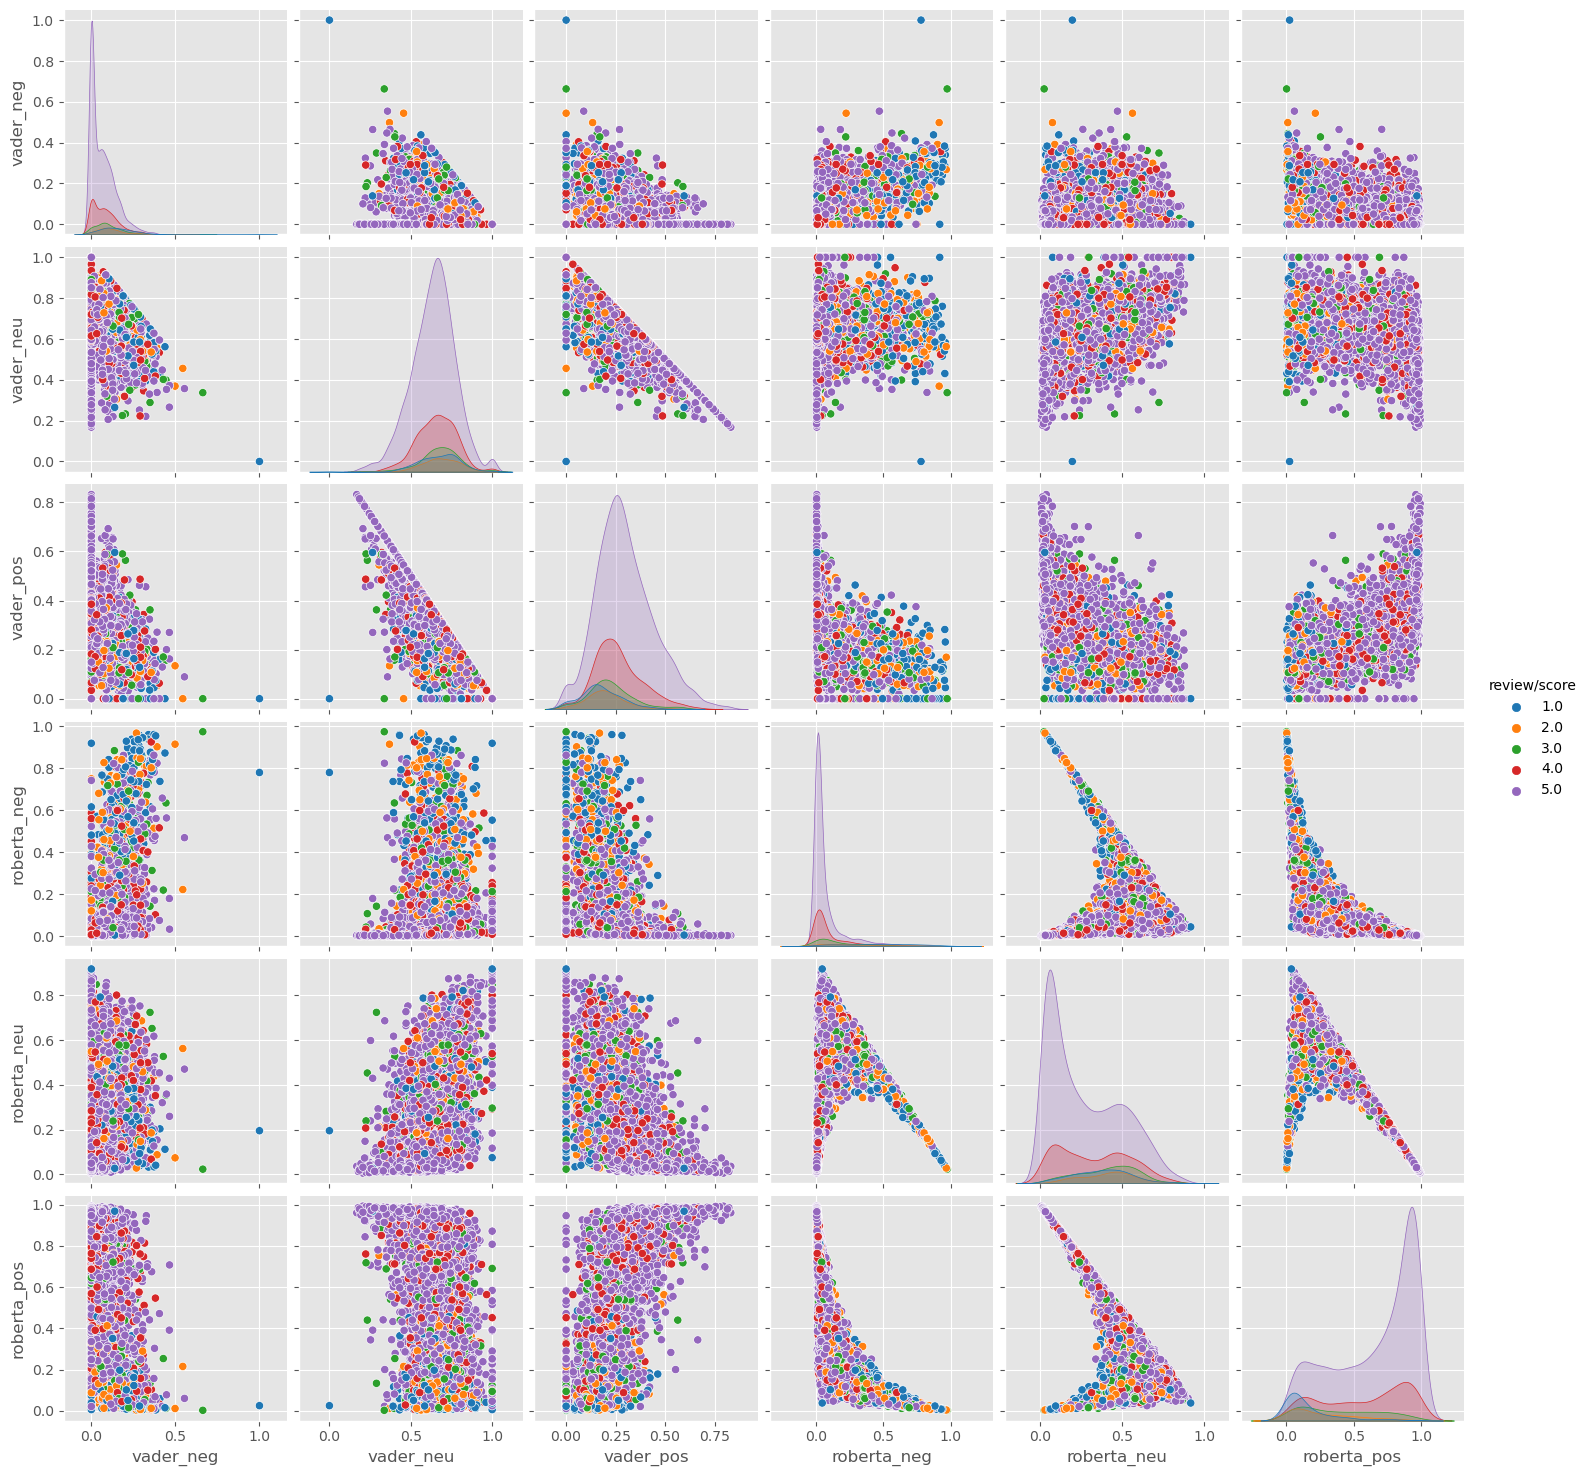

In [81]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='review/score',
            palette='tab10')
plt.show()

Review The Examples and Compare Vader to Roberta

In [85]:
results_df.query('`review/score` == 1.0') \
    .sort_values('roberta_pos', ascending=False)['review/text'].values[0]

"burlesque fascinating . always new adventure , new friend glamor . book , well filled error , trivializes wonderful venue . n't waste money ."

In [87]:
results_df.query('`review/score` == 1') \
    .sort_values('vader_pos', ascending=False)['review/text'].values[0]

"burlesque fascinating . always new adventure , new friend glamor . book , well filled error , trivializes wonderful venue . n't waste money ."

In [88]:
# nevative sentiment 5-Star view

results_df.query('`review/score` == 5.0') \
    .sort_values('roberta_neg', ascending=False)['review/text'].values[0]

"know ineffective judicial system . bad judge n't fell way judge judy"

In [89]:
results_df.query('`review/score` == 5.0') \
    .sort_values('vader_neg', ascending=False)['review/text'].values[0]

"'ll suprised thought provoking depiction anger life effected anger anger people life . n't think emotional wellness effected anger . anger active aggression , loud outburst , fighting . everyone experience anger . 'll relate case study would like think ."

In [ ]:
# Vader results and Roberta results

res = {}
for i, row in tqdm(books_reviewed.iterrows(), total=len(books_reviewed)):
    try:
        text = row['review/text']
        myid = row['review_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 785900
Broke for id 2523652
Broke for id 1267893
Broke for id 2908289
Broke for id 2182458
Broke for id 581485
Broke for id 1093807
Broke for id 1124991
Broke for id 8967
Broke for id 2098580
Broke for id 328430
Broke for id 2180230
Broke for id 19093
Broke for id 223396
Broke for id 2181423
Broke for id 2914726
Broke for id 770674
Broke for id 579017
Broke for id 1877789
Broke for id 1876444
Broke for id 757656
Broke for id 2940726
Broke for id 466614
Broke for id 405591
Broke for id 910925
Broke for id 595273
Broke for id 339700
Broke for id 1143250
Broke for id 840473
Broke for id 80536
Broke for id 1614501
Broke for id 2369942
Broke for id 424115
Broke for id 1446395
Broke for id 2330279
Broke for id 1958208
Broke for id 685101
Broke for id 2608973
Broke for id 1374319
Broke for id 328493
Broke for id 378829
Broke for id 2376276
Broke for id 2274288
Broke for id 565100
Broke for id 75190
Broke for id 2307684
Broke for id 2377591
Broke for id 126647
Broke for id 1699506